In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as dt
import quandl
%matplotlib inline
from matplotlib.finance import candlestick_ohlc
import matplotlib.dates as mdates
from matplotlib import style

style.use('ggplot')

C:\Users\ashis\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: The finance module has been deprecated in mpl 2.0 and will be removed in mpl 2.2. Please use the module mpl_finance instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [2]:
axis_data = quandl.get('NSE/AXISBANK', start_date = '2015-01-01')

In [3]:
axis_data.index

DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-05', '2015-01-06',
               '2015-01-07', '2015-01-08', '2015-01-09', '2015-01-12',
               '2015-01-13', '2015-01-14',
               ...
               '2018-02-16', '2018-02-19', '2018-02-20', '2018-02-21',
               '2018-02-22', '2018-02-23', '2018-02-26', '2018-02-27',
               '2018-02-28', '2018-03-01'],
              dtype='datetime64[ns]', name='Date', length=785, freq=None)

In [4]:
axis_data.tail()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2018-02-23,527.0,538.90,525.55,537.50,536.65,3888629.0,20757.56
2018-02-26,541.1,554.40,539.00,550.00,552.30,5297794.0,29036.44
2018-02-27,551.6,551.60,536.15,539.50,538.40,4136383.0,22462.84
2018-02-28,534.0,536.50,520.00,526.70,528.75,6626661.0,34996.01
2018-03-01,524.0,535.55,522.00,526.65,525.75,9827510.0,52023.66


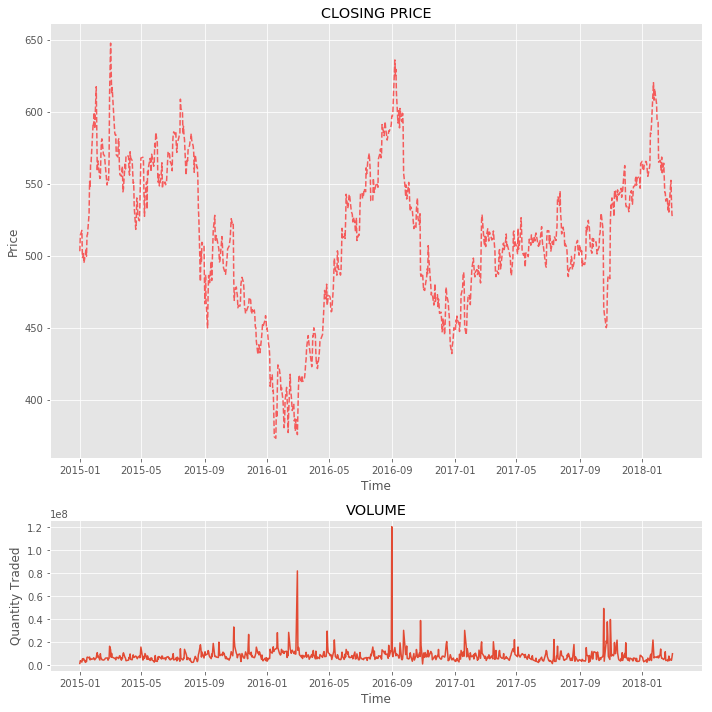

In [5]:
plt.figure(figsize = (10,10))

ax1 = plt.subplot2grid((10,10),(0,0), rowspan = 7,colspan =10)
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('CLOSING PRICE')

ax2 = plt.subplot2grid((10,10),(7,0),rowspan = 3, colspan = 10)
plt.xlabel('Time')
plt.ylabel('Quantity Traded')
plt.title('VOLUME')

ax1.plot(axis_data['Close'], linestyle = '--',color = 'r', alpha = 0.6)
ax2.plot(axis_data['Total Trade Quantity'])

ax1.grid(True)
ax2.grid(True)


plt.tight_layout()
plt.show()

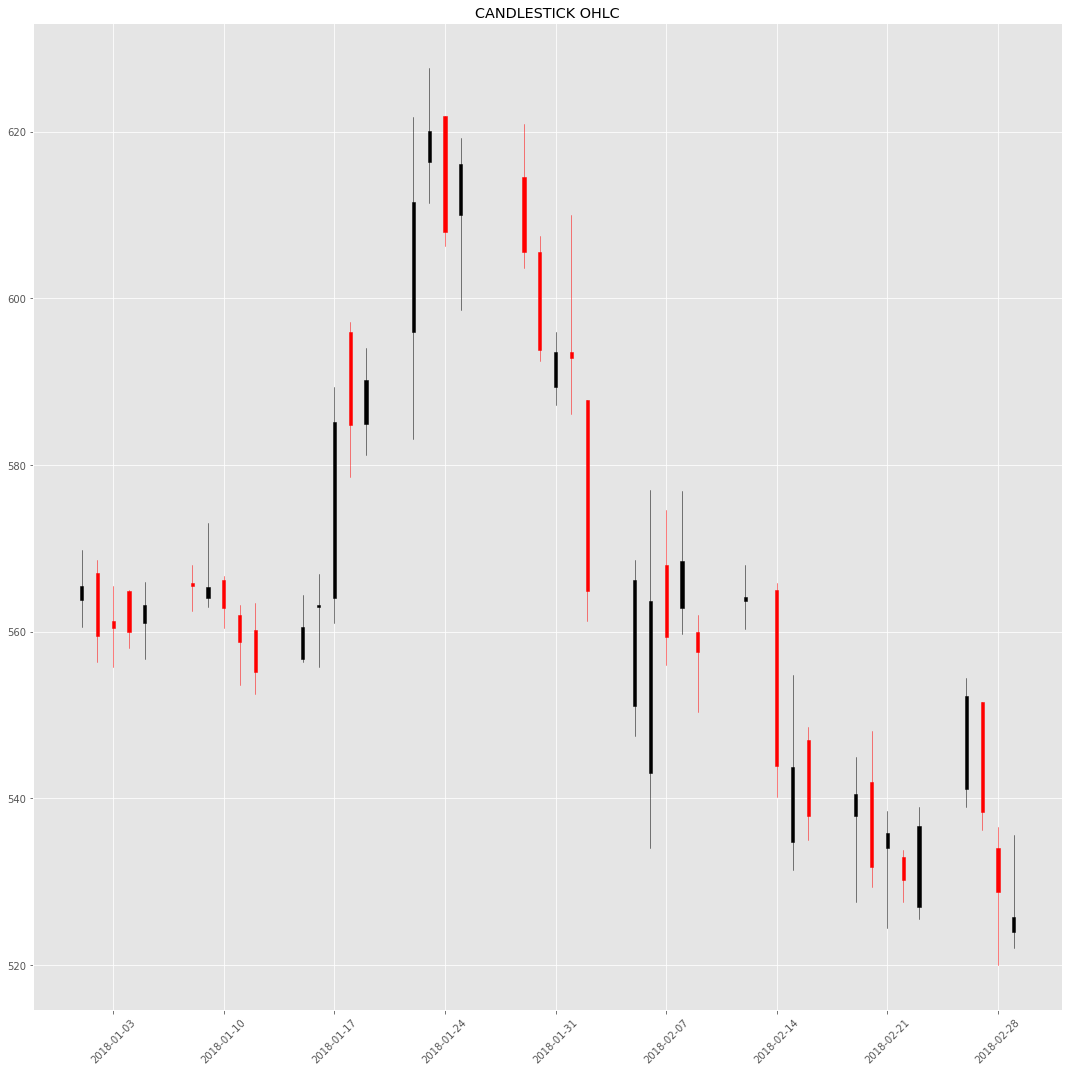

In [6]:
ohlc = axis_data.loc['2018'][['Open','High','Low','Close']]
ohlc.reset_index(inplace = True)
ohlc['Date'] = ohlc['Date'].map(mdates.date2num)


fig = plt.figure(figsize = (15,15))
ax1 = fig.subplots()


for label in ax1.get_xticklabels():
    label.set_rotation(45)

ax1.xaxis_date()
ax1.grid(True)
candlestick_ohlc(ax1,ohlc.values)

plt.title('CANDLESTICK OHLC')
plt.tight_layout()
plt.show()

In [7]:
axis_data.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,785.000000,785.000000,785.000000,785.000000,785.000000,7.850000e+02,785.000000
mean,513.516497,519.841529,506.399873,512.923185,512.897325,8.357423e+06,42352.171592
std,51.743565,52.253931,50.996298,51.657143,51.618622,6.827193e+06,35250.777714
min,372.250000,383.350000,366.750000,372.850000,373.200000,9.377010e+05,4581.790000
25%,483.050000,488.200000,474.450000,481.000000,482.050000,5.258296e+06,26882.080000
50%,513.500000,519.000000,506.750000,513.000000,513.150000,6.985211e+06,35917.570000
75%,553.000000,558.800000,545.350000,552.000000,551.800000,9.743637e+06,48139.760000
max,650.900000,654.900000,628.700000,650.000000,647.550000,1.205419e+08,717955.040000


In [8]:
moving_averages = [21,42,100]

for num in moving_averages:
    def moving(num):
        return(axis_data['Close'].rolling(num).mean())
    axis_data['MA {}'.format(num)] = moving(num)
    
axis_data['Volatility'] = axis_data['Close'].rolling(21).std()


In [9]:
axis_data.head(3)

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs),MA 21,MA 42,MA 100,Volatility
Date,,,,,,,,,,,
2015-01-01,502.65,504.0,499.05,503.00,503.05,1351985.0,6779.90,NaN,NaN,NaN,NaN
2015-01-02,503.20,516.9,501.70,514.55,514.30,3852825.0,19738.87,NaN,NaN,NaN,NaN
2015-01-05,516.90,520.4,515.10,516.50,517.55,2561430.0,13262.09,NaN,NaN,NaN,NaN


Text(0.5,1,'MOVING AVERAGE')

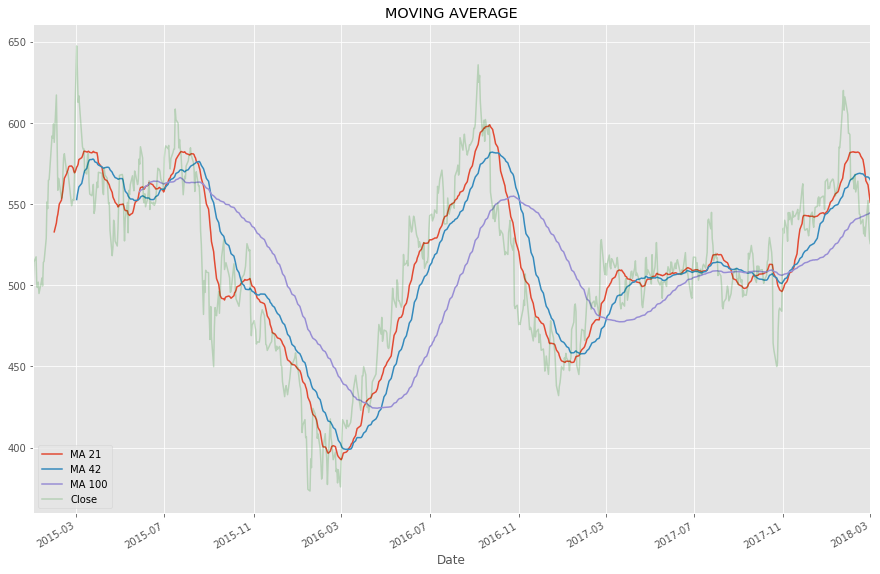

In [10]:
axis_data.loc[:,['MA 21', 'MA 42','MA 100']].plot(figsize  =(15,10))
axis_data['Close'].plot(alpha = 0.2, figsize = (15,10),legend = True, color = 'g')
plt.title('MOVING AVERAGE')

Text(0.5,1,'VOLATILITY')

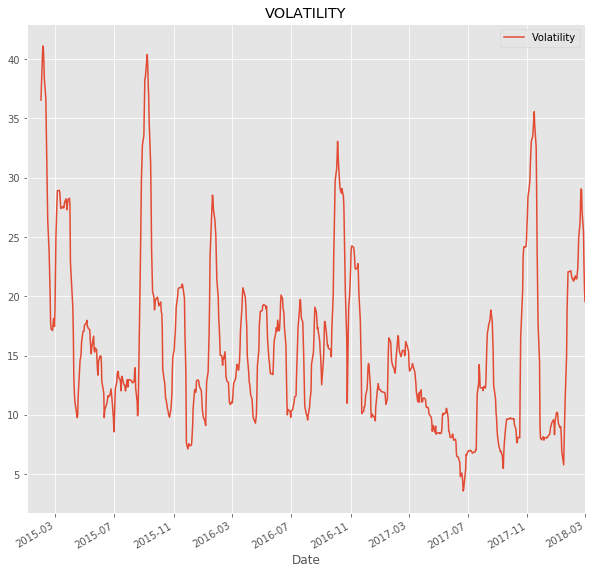

In [11]:
axis_data['Volatility'].plot(figsize = (10,10), legend = True, grid = True)
plt.title('VOLATILITY')

In [12]:
axis_data['Pct_change'] = axis_data['Close'].pct_change()

In [13]:
axis_data.head()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs),MA 21,MA 42,MA 100,Volatility,Pct_change
Date,,,,,,,,,,,,
2015-01-01,502.65,504.00,499.05,503.00,503.05,1351985.0,6779.90,NaN,NaN,NaN,NaN,NaN
2015-01-02,503.20,516.90,501.70,514.55,514.30,3852825.0,19738.87,NaN,NaN,NaN,NaN,0.022364
2015-01-05,516.90,520.40,515.10,516.50,517.55,2561430.0,13262.09,NaN,NaN,NaN,NaN,0.006319
2015-01-06,513.55,513.55,496.75,498.50,499.05,5284530.0,26584.93,NaN,NaN,NaN,NaN,-0.035745
2015-01-07,498.80,505.35,494.50,501.00,498.65,4245189.0,21212.71,NaN,NaN,NaN,NaN,-0.000802


In [14]:
axis_data['Pct_change'].describe()

count    784.000000
mean       0.000246
std        0.019475
min       -0.094807
25%       -0.010268
50%       -0.000094
75%        0.009724
max        0.080888
Name: Pct_change, dtype: float64

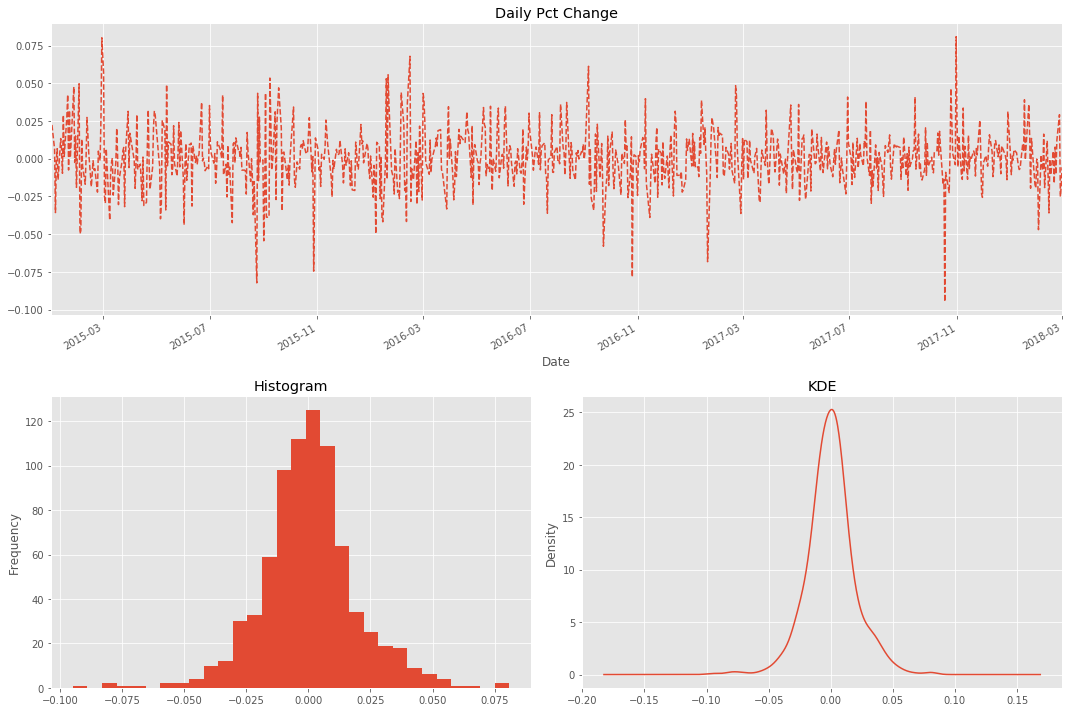

In [15]:
ax1 = plt.subplot2grid((2,2),(0,0), rowspan = 1,colspan = 2)
axis_data['Pct_change'].plot(figsize = (15,10),linestyle = '--', grid = True)
plt.title('Daily Pct Change')

ax2 = plt.subplot2grid((2,2),(1,0),rowspan = 1,colspan = 1)
axis_data['Pct_change'].hist(figsize = (15,10),bins = 30)
plt.ylabel('Frequency')
plt.title('Histogram')

ax3 = plt.subplot2grid((2,2),(1,1),rowspan = 1,colspan = 1)
axis_data['Pct_change'].plot(figsize = (15,10),kind = 'kde',grid = True)
plt.title('KDE')

plt.tight_layout()

In [16]:
axis_data['Cum_return'] = (1 + axis_data['Pct_change']).cumprod()

In [17]:
axis_data.head()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs),MA 21,MA 42,MA 100,Volatility,Pct_change,Cum_return
Date,,,,,,,,,,,,,
2015-01-01,502.65,504.00,499.05,503.00,503.05,1351985.0,6779.90,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-02,503.20,516.90,501.70,514.55,514.30,3852825.0,19738.87,NaN,NaN,NaN,NaN,0.022364,1.022364
2015-01-05,516.90,520.40,515.10,516.50,517.55,2561430.0,13262.09,NaN,NaN,NaN,NaN,0.006319,1.028824
2015-01-06,513.55,513.55,496.75,498.50,499.05,5284530.0,26584.93,NaN,NaN,NaN,NaN,-0.035745,0.992049
2015-01-07,498.80,505.35,494.50,501.00,498.65,4245189.0,21212.71,NaN,NaN,NaN,NaN,-0.000802,0.991253


Text(0.5,1,'CUMMULATIVE RETURN')

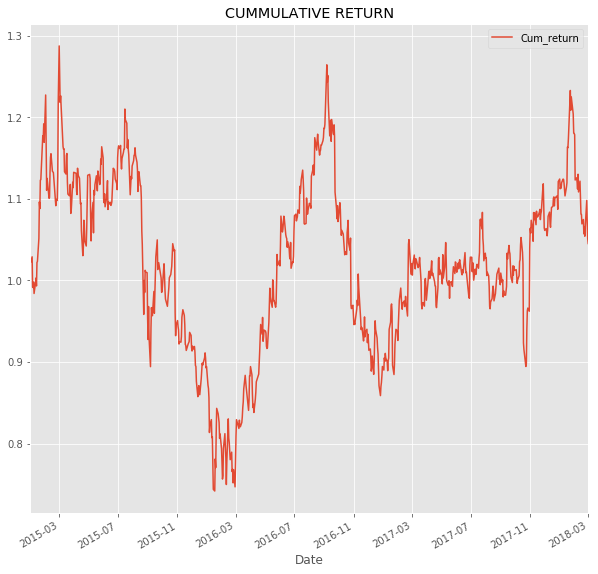

In [18]:
axis_data['Cum_return'].plot(figsize = (10,10),grid = True,legend = True)
plt.title('CUMMULATIVE RETURN')

In [19]:
del axis_data['Volatility']

In [20]:
del axis_data['Cum_return']

In [21]:
del axis_data['Pct_change']

In [22]:
axis_data.head()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs),MA 21,MA 42,MA 100
Date,,,,,,,,,,
2015-01-01,502.65,504.00,499.05,503.00,503.05,1351985.0,6779.90,NaN,NaN,NaN
2015-01-02,503.20,516.90,501.70,514.55,514.30,3852825.0,19738.87,NaN,NaN,NaN
2015-01-05,516.90,520.40,515.10,516.50,517.55,2561430.0,13262.09,NaN,NaN,NaN
2015-01-06,513.55,513.55,496.75,498.50,499.05,5284530.0,26584.93,NaN,NaN,NaN
2015-01-07,498.80,505.35,494.50,501.00,498.65,4245189.0,21212.71,NaN,NaN,NaN


In [23]:
axis_data.head()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs),MA 21,MA 42,MA 100
Date,,,,,,,,,,
2015-01-01,502.65,504.00,499.05,503.00,503.05,1351985.0,6779.90,NaN,NaN,NaN
2015-01-02,503.20,516.90,501.70,514.55,514.30,3852825.0,19738.87,NaN,NaN,NaN
2015-01-05,516.90,520.40,515.10,516.50,517.55,2561430.0,13262.09,NaN,NaN,NaN
2015-01-06,513.55,513.55,496.75,498.50,499.05,5284530.0,26584.93,NaN,NaN,NaN
2015-01-07,498.80,505.35,494.50,501.00,498.65,4245189.0,21212.71,NaN,NaN,NaN


In [24]:
axis_data['21d-42d'] = axis_data['MA 21'] - axis_data['MA 42']

In [26]:
axis_data['Regime'] =np.where(axis_data['21d-42d']>0,1,0)

axis_data['Regime'] = np.where(axis_data['21d-42d']<0,-1,axis_data['Regime'])

In [27]:
axis_data.tail()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs),MA 21,MA 42,MA 100,21d-42d,Regime
Date,,,,,,,,,,,,
2018-02-23,527.0,538.90,525.55,537.50,536.65,3888629.0,20757.56,564.502381,566.823810,543.4335,-2.321429,-1
2018-02-26,541.1,554.40,539.00,550.00,552.30,5297794.0,29036.44,561.852381,566.759524,543.8600,-4.907143,-1
2018-02-27,551.6,551.60,536.15,539.50,538.40,4136383.0,22462.84,558.152381,566.373810,544.1845,-8.221429,-1
2018-02-28,534.0,536.50,520.00,526.70,528.75,6626661.0,34996.01,554.495238,565.942857,544.4600,-11.447619,-1
2018-03-01,524.0,535.55,522.00,526.65,525.75,9827510.0,52023.66,551.257143,565.033333,544.6840,-13.776190,-1


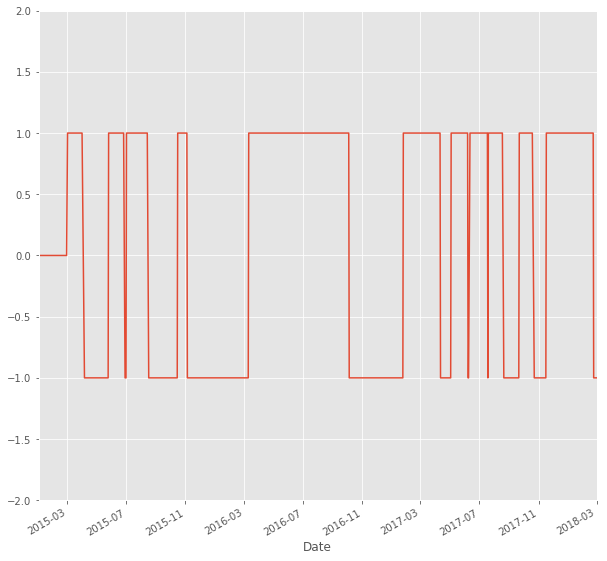

In [28]:
axis_data['Regime'].plot(ylim = (-2,2),figsize = (10,10))

In [29]:
axis_data['Regime'].value_counts()

 1    439
-1    305
 0     41
Name: Regime, dtype: int64

In [31]:
axis_data['Signal'] = np.sign(axis_data['Regime'] - axis_data['Regime'].shift(1))


C:\Users\ashis\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sign
  """Entry point for launching an IPython kernel.


In [32]:
axis_data['Signal'].value_counts()

 0.0    762
-1.0     11
 1.0     11
Name: Signal, dtype: int64

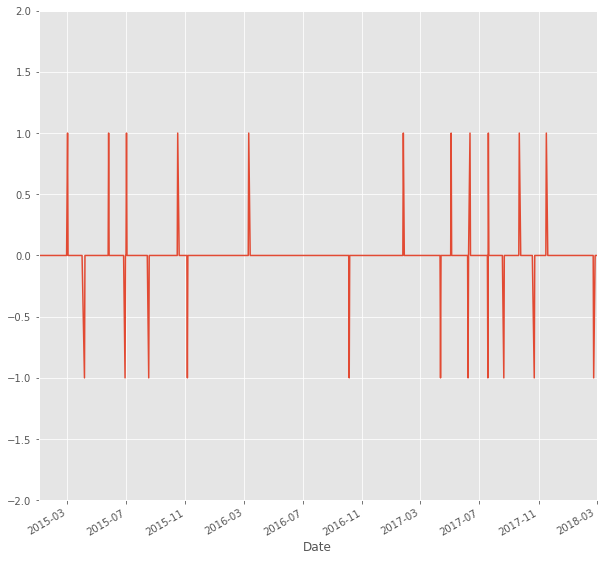

In [33]:
axis_data['Signal'].plot(figsize = (10,10),ylim = (-2,2))

In [34]:
axis_data['Close'][axis_data['Signal'] == 1]

Date
2015-03-02    647.55
2015-05-26    564.25
2015-07-02    584.00
2015-10-16    504.65
2016-03-11    412.80
2017-01-25    463.55
2017-05-04    518.85
2017-06-12    507.50
2017-07-20    540.00
2017-09-22    505.30
2017-11-17    542.40
Name: Close, dtype: float64

In [47]:
axis_signals = pd.concat([pd.DataFrame({'Price': axis_data['Close'][axis_data['Signal']==1],
                            'Regime': axis_data['Regime'][axis_data['Signal']==1],
                            'Signal': 'Buy'
                            }),
                         pd.DataFrame({'Price': axis_data['Close'][axis_data['Signal']==-1],
                            'Regime': axis_data['Regime'][axis_data['Signal']==-1],
                            'Signal': 'Sell'
                            })
                         
                         ])

In [55]:
axis_signals.sort_index()
axis_signals

,Price,Regime,Signal
Date,,,
2015-03-02,647.55,1,Buy
2015-04-06,569.05,-1,Sell
2015-05-26,564.25,1,Buy
2015-06-29,562.70,-1,Sell
2015-07-02,584.00,1,Buy
2015-08-17,561.40,-1,Sell
2015-10-16,504.65,1,Buy
2015-11-05,463.80,-1,Sell
2016-03-11,412.80,1,Buy


In [184]:
long_profits = pd.DataFrame({
                            'Price' : axis_signals['Price'][axis_signals['Signal']=='Buy'],
                             'Profit' : pd.Series((axis_signals['Price'] - axis_signals['Price'].shift(1))[axis_signals['Signal'] == 'Sell']).tolist(),                   
                             'End Date' : axis_signals[axis_signals['Signal']=='Sell'].index
                               })

In [187]:
print('Profits made from different Trades')
long_profits

Profits made from different Trades


,End Date,Price,Profit
Date,,,
2015-03-02,2015-04-06,647.55,-78.50
2015-05-26,2015-06-29,564.25,-1.55
2015-07-02,2015-08-17,584.00,-22.60
2015-10-16,2015-11-05,504.65,-40.85
2016-03-11,2016-10-05,412.80,122.90
2017-01-25,2017-04-12,463.55,42.45
2017-05-04,2017-06-08,518.85,-3.10
2017-06-12,2017-07-19,507.50,12.70
2017-07-20,2017-08-21,540.00,-45.20


In [ ]:
def lowest_value()